In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
f = open('../experiment_data/mturk-experiment-2.json')
  
data = json.load(f)
  
f.close()

In [36]:
agents = ['bc_simple_1', 'nct_simple_1', 'action_cml_simple_1', 'sac_self_play_simple_0_1']
feedback_subtasks = [5, 7, 9, 11]
game_subtasks = [4, 6, 8, 10]
workers = range(len(data))

In [35]:
data[5]['results']['data'][6]['data']['trajectory'][0]['player_1_id']

'bc_simple_1'

In [64]:
data[0].keys()

dict_keys(['HITId', 'AssignmentId', 'WorkerId', 'workerId', 'results'])

In [45]:
data[5]['results']['data'][4]['data']['trajectory'][0]['player_1_id']
data[0]['results']['data'][4+1]



{'helpful': '6',
 'competent': '5',
 'enjoy': '6',
 'humanlike': '7',
 'efficient': '7',
 'flexible': '6',
 'predictable': '6',
 'partnerFeedback': 'GOOD'}

In [95]:
all_data = pd.DataFrame()
df = pd.DataFrame()


responses = []
for worker in workers:
    for agent in agents:
        for game_subtask in game_subtasks: #find the right subtask for the agent order
            if (data[worker]['results']['data'][game_subtask]['data']['trajectory'][0]['player_1_id'] == agent):
                game_info = data[worker]['results']['data'][game_subtask+1]
                game_info['agent'] = agent
                game_info['workerId'] = data[worker]['workerId']
                responses.append(data[worker]['results']['data'][game_subtask+1])

df = pd.DataFrame.from_dict(responses)


    
# df = pd.DataFrame.from_dict(responses)
# df = df.drop(columns=['partnerFeedback']).astype('int')
# df.columns = [title + '-' + str(j) for title in df.columns]
# all_data = pd.concat([all_data, df], axis=1)

In [114]:
#Cell for getting all the feedback data
agents[0]
feedback_data = df[df['agent'] == agents[0]][['partnerFeedback','agent']]
pd.set_option('display.max_colwidth', None)
feedback_data

,partnerFeedback,agent
0,GOOD,bc_simple_1
4,"This partner seemed a bit confusing and our soup-making was slow and chaotic. He was simply moving back and forth at times, which was a bit distracting.",bc_simple_1
8,no,bc_simple_1
12,Sometimes Struggle my partner,bc_simple_1
16,good Task,bc_simple_1
20,NICE,bc_simple_1
24,,bc_simple_1
28,,bc_simple_1
32,very interested,bc_simple_1


Finished helpful-bc_simple_1
Finished competent-bc_simple_1
Finished enjoy-bc_simple_1
Finished humanlike-bc_simple_1
Finished efficient-bc_simple_1
Finished flexible-bc_simple_1
Finished predictable-bc_simple_1
bc_simple_1 now completed
Finished helpful-nct_simple_1
Finished competent-nct_simple_1
Finished enjoy-nct_simple_1
Finished humanlike-nct_simple_1
Finished efficient-nct_simple_1
Finished flexible-nct_simple_1
Finished predictable-nct_simple_1
nct_simple_1 now completed
Finished helpful-action_cml_simple_1
Finished competent-action_cml_simple_1
Finished enjoy-action_cml_simple_1
Finished humanlike-action_cml_simple_1
Finished efficient-action_cml_simple_1
Finished flexible-action_cml_simple_1
Finished predictable-action_cml_simple_1
action_cml_simple_1 now completed
Finished helpful-sac_self_play_simple_0_1
Finished competent-sac_self_play_simple_0_1
Finished enjoy-sac_self_play_simple_0_1
Finished humanlike-sac_self_play_simple_0_1
Finished efficient-sac_self_play_simple_0_1


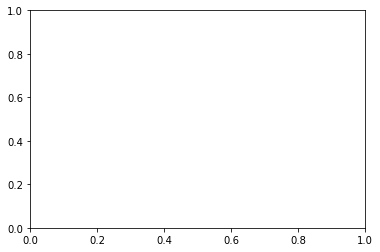

In [162]:
all_agents_df = pd.DataFrame()

for agent in agents:
    agent_df = df[df['agent'] == agent]
    agent_df.columns = [title + '-' + agent for title in df.columns]
    drop_columns = ['partnerFeedback', 'workerId', 'agent']
    drop_columns = [column + '-' + agent for column in drop_columns]
    agent_df = agent_df.drop(columns=drop_columns).astype('int')
    all_agents_df = pd.concat([all_agents_df, agent_df], axis=1)

    for column in agent_df:
        ax = agent_df[column].plot.hist(ylim=(0,9), bins=8, xlim=(1,7), title=column)

        ax.plot()
        plt.savefig(column)
        ax.clear()

        print('Finished ' + column)

    print(agent + ' now completed')
# pd.DataFrame.hist(agent_df, bins=8, figsize=(30,20), layout=(7,7), grid=False, sharey=True, sharex=True,)

Finished


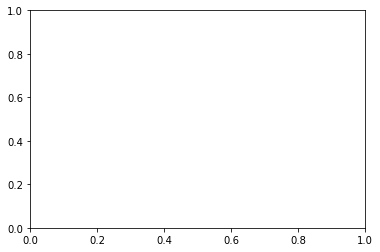

In [160]:

for column in agent_df:
    ax = agent_df[column].plot.hist(ylim=(0,9), bins=8, xlim=(1,7), title=column)

    ax.plot()
    plt.savefig(column)
    ax.clear()

    print('Finished ' + column)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fceacd12390>,
      dtype=object)

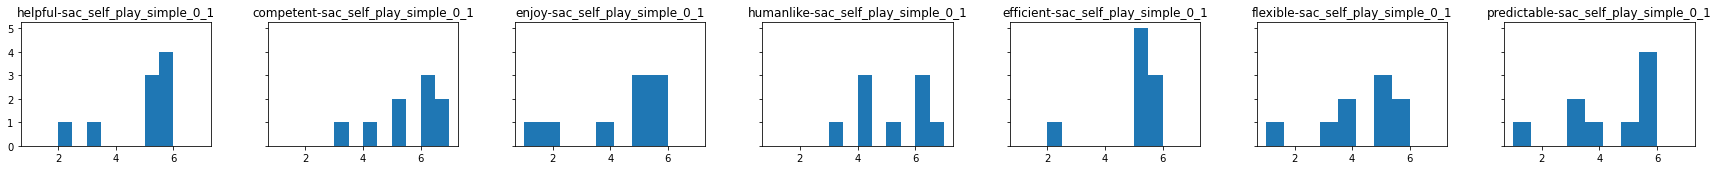

In [132]:
agent_df
pd.DataFrame.hist(agent_df, bins=8, figsize=(30,20), layout=(7,7), grid=False, sharey=True, sharex=True, align='mid')

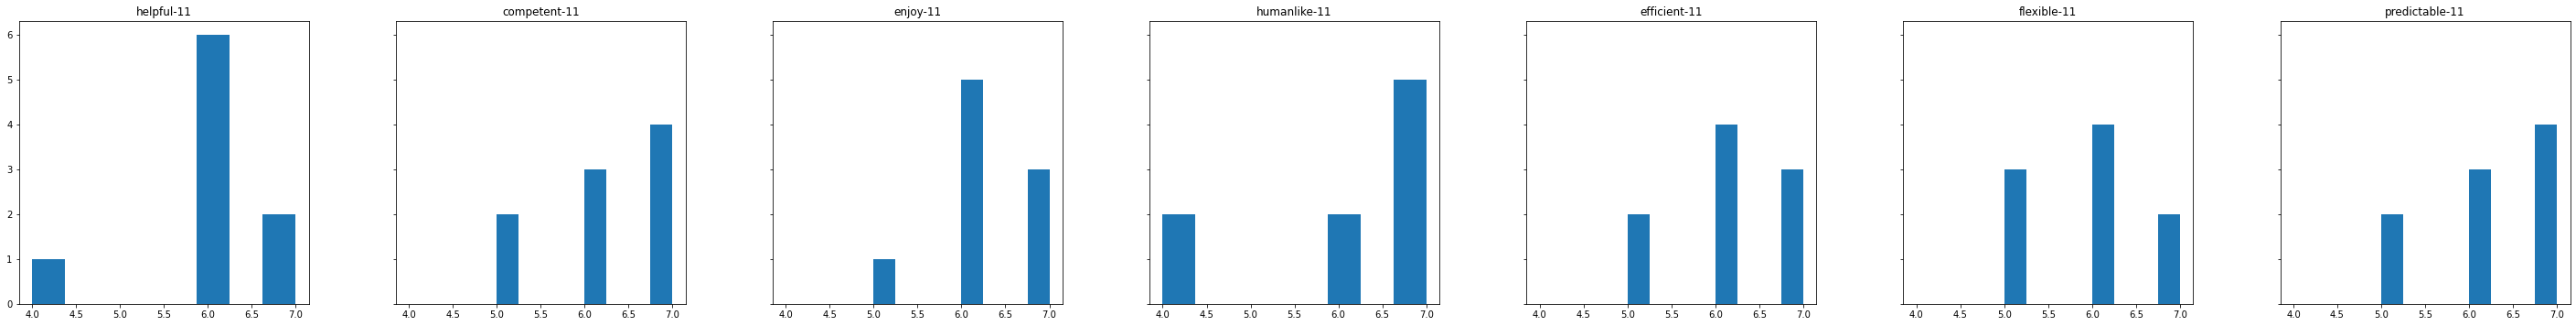

In [283]:
all_data = pd.DataFrame()


for j in [5, 7, 9, 11]:
    responses = []
    for i in range(9):
        responses.append(data[i]['results']['data'][j])
    df = pd.DataFrame.from_dict(responses)
    df = df.drop(columns=['partnerFeedback']).astype('int')
    df.columns = [title + '-' + str(j) for title in df.columns]
    all_data = pd.concat([all_data, df], axis=1)



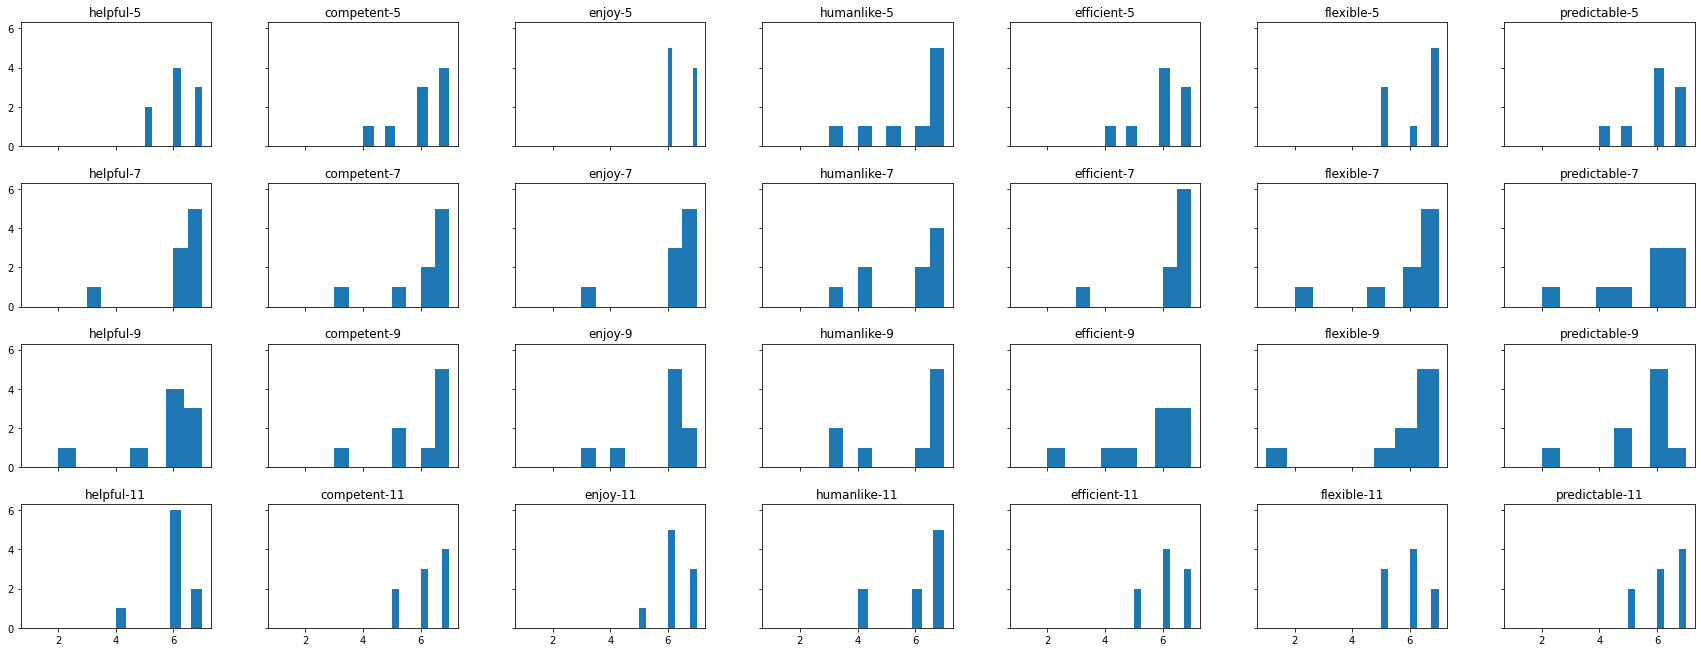

In [291]:
ax = pd.DataFrame.hist(all_data, bins=8, figsize=(30,20), layout=(7,7), grid=False, sharey=True, sharex=True, align='mid')

In [292]:
all_data

,helpful-5,competent-5,enjoy-5,humanlike-5,efficient-5,flexible-5,predictable-5,helpful-7,competent-7,enjoy-7,...,efficient-9,flexible-9,predictable-9,helpful-11,competent-11,enjoy-11,humanlike-11,efficient-11,flexible-11,predictable-11
0,6,5,6,4,5,5,4,6,5,6,...,6,6,5,6,5,6,4,6,5,6
1,7,7,7,7,7,7,7,7,7,7,...,7,7,6,7,7,7,7,7,6,7
2,6,7,7,7,7,7,6,7,7,7,...,7,7,6,6,7,7,7,7,6,7
3,5,6,6,6,6,6,6,3,3,3,...,5,6,6,6,6,6,6,6,6,5
4,5,4,6,3,4,5,5,7,6,6,...,4,5,5,6,6,5,4,5,5,5
5,6,7,6,7,6,7,6,6,7,6,...,6,7,6,6,7,6,7,6,7,6
6,6,6,6,5,6,5,6,6,7,7,...,2,1,2,6,6,6,6,6,5,6
7,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
8,7,6,7,7,6,7,7,7,6,7,...,6,7,6,4,5,6,7,5,6,7


In [280]:
responses = []
for i in range(9):
    responses.append(data[i]['results']['data'][j])
df = pd.DataFrame.from_dict(responses)
df = df.drop(columns=['partnerFeedback']).astype('int')

In [281]:
df

,helpful,competent,enjoy,humanlike,efficient,flexible,predictable
0,6,5,6,4,6,5,6
1,7,7,7,7,7,6,7
2,6,7,7,7,7,6,7
3,6,6,6,6,6,6,5
4,6,6,5,4,5,5,5
5,6,7,6,7,6,7,6
6,6,6,6,6,6,5,6
7,7,7,7,7,7,7,7
8,4,5,6,7,5,6,7


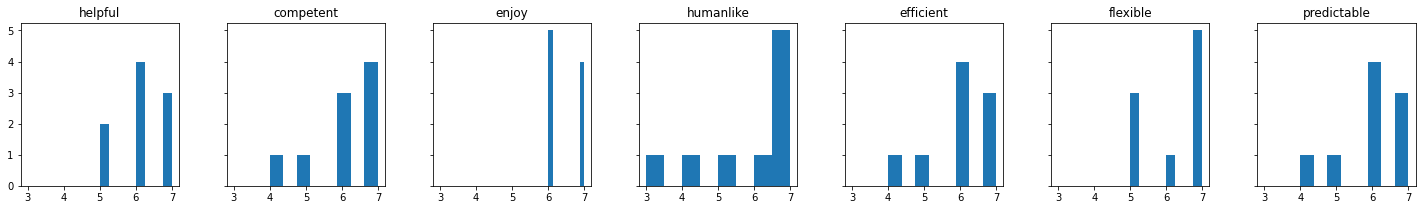

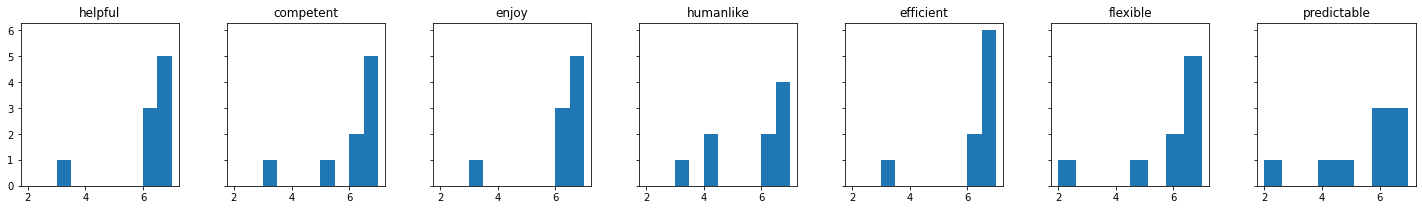

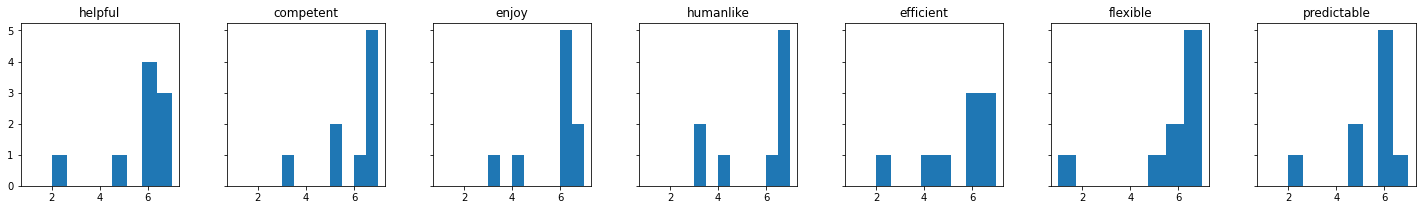

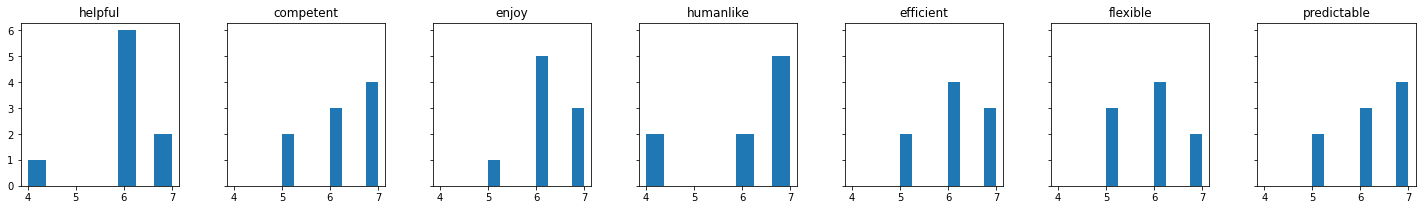

In [252]:
for j in [5, 7, 9, 11]:
    responses = []
    for i in range(9):
        responses.append(data[i]['results']['data'][j])
    df = pd.DataFrame.from_dict(responses)
    df = df.drop(columns=['partnerFeedback']).astype('int')
    ax = pd.DataFrame.hist(df, bins=8, figsize=(25,3), layout=(1,7), grid=False, sharey=True, sharex=True, align='mid');

In [ ]:
responses = []
for i in range(9):
    responses.append(data[i]['results']['data'][7])
df = pd.DataFrame.from_dict(responses)
df = df.drop(columns=['partnerFeedback']).astype('int')
ax = pd.DataFrame.hist(df, bins=8, figsize=(25,3), layout=(1,7), grid=False, sharey=True, sharex=True, align='mid');

In [ ]:
responses = []
for i in range(9):
    responses.append(data[i]['results']['data'][9])
df = pd.DataFrame.from_dict(responses)
df = df.drop(columns=['partnerFeedback']).astype('int')
ax = pd.DataFrame.hist(df, bins=8, figsize=(25,3), layout=(1,7), grid=False, sharey=True, sharex=True, align='mid');

In [ ]:
responses = []
for i in range(9):
    responses.append(data[i]['results']['data'][9])
df = pd.DataFrame.from_dict(responses)
df = df.drop(columns=['partnerFeedback']).astype('int')
ax = pd.DataFrame.hist(df, bins=8, figsize=(25,3), layout=(1,7), grid=False, sharey=True, sharex=True, align='mid');

In [37]:
data[i]['results']['data'][13]

{'games': [['human', 'sac_self_play_simple_0'],
  ['human', 'nct_simple'],
  ['human', 'action_cml_simple'],
  ['human', 'bc_simple']],
 'nGamesPerPartner': 1,
 'nSecondsPerGame': 60,
 'nSecondsPerTutorial': 60,
 'layout': 'simple',
 'path': 'default.json'}